## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




In [2]:


# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

df_clean = df0.rename(columns={'average_montly_hours' : 'avg_monthly_hours','promotion_last_5years' : 'promotion_last_5_years', 'time_spend_company' :'time_spent_company', 'number_project' : 'project_number'})
# Display all column names after the update
### YOUR CODE HERE ###
lower_case = df_clean.columns.str.lower()


In [7]:
df_clean = df_clean.rename(str.lower, axis=1)


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df_clean.isna().sum()

satisfaction_level        0
last_evaluation           0
project_number            0
avg_monthly_hours         0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df_clean.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df_duplicates = df_clean.duplicated()


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_duplicates.sort_values()


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
duplicates = []
duplicates = df_duplicates.index[df_duplicates == True].tolist()

In [12]:
df_clean.loc[duplicates].sort_values(by='department')

,satisfaction_level,last_evaluation,project_number,avg_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
14276,0.81,0.70,6,161,4,0,1,0,IT,medium
12599,0.11,0.92,7,307,4,0,1,0,IT,low
13556,0.80,0.67,3,178,3,0,0,0,IT,low
14175,0.82,0.80,5,205,3,0,0,0,IT,low
14176,0.84,0.81,4,236,3,1,0,0,IT,low
...,...,...,...,...,...,...,...,...,...,...
12418,0.42,0.53,3,199,4,0,1,0,technical,medium
12417,0.11,0.90,6,264,4,0,1,0,technical,medium
14086,0.42,0.47,6,174,5,0,0,0,technical,low
12422,0.86,1.00,5,257,5,0,1,0,technical,medium


In [13]:
df_workable = df_clean.drop_duplicates(keep='first')

In [14]:
df_workable.duplicated().value_counts()

False    11991
dtype: int64

### Check outliers

Check for outliers in the data.

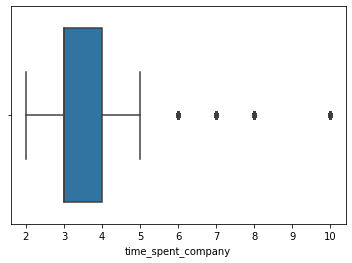

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df_workable['time_spent_company'])



In [82]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25= df_workable['time_spent_company'].quantile(0.25)
percentile75= df_workable['time_spent_company'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + iqr * 1.5
lower_limit = percentile25 - iqr * 1.5


In [85]:
tenured_data = df_workable[(df_workable['time_spent_company'] > upper_limit) |  (df_workable['time_spent_company'] < lower_limit)]

In [86]:
print("Number of rows in the data containing outliers in 'tenure'", len(tenured_data))

Number of rows in the data containing outliers in 'tenure' 824


In [87]:
tenured_data


,satisfaction_level,last_evaluation,project_number,avg_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
1,0.80,0.86,5,262,6,0,1,0,1,2
17,0.78,0.99,4,255,6,0,1,0,1,1
34,0.84,0.87,4,246,6,0,1,0,9,1
47,0.57,0.70,3,273,6,0,1,0,3,1
67,0.90,0.98,4,264,6,0,1,0,6,2
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,10,3
11995,0.90,0.55,3,259,10,1,0,1,10,3
11996,0.74,0.95,5,266,10,0,0,1,10,3
11997,0.85,0.54,3,185,10,0,0,1,10,3


In [16]:
df_workable['time_spent_company'].value_counts(normalize=True)*100

3     43.282462
2     24.268201
4     16.720874
5      8.856642
6      4.520057
10     0.892336
7      0.783921
8      0.675507
Name: time_spent_company, dtype: float64

In [88]:
tenured_data['time_spent_company'].value_counts(normalize=True)*100

6     65.776699
10    12.985437
7     11.407767
8      9.830097
Name: time_spent_company, dtype: float64

In [58]:
df_workable.shape

(11991, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df_workable['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df_workable['left'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

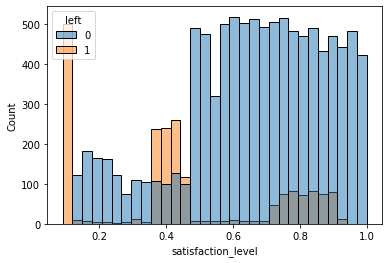

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='satisfaction_level', hue='left')

In [67]:
df_workable.columns

Index(['satisfaction_level', 'last_evaluation', 'project_number',
       'avg_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

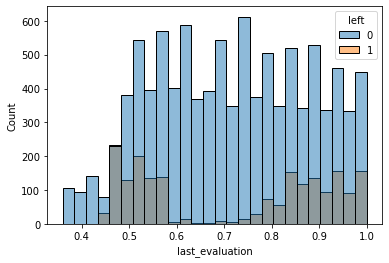

In [68]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='last_evaluation', hue='left')

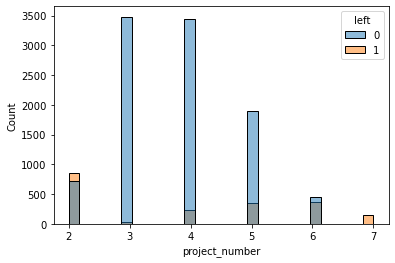

In [69]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='project_number', hue='left')

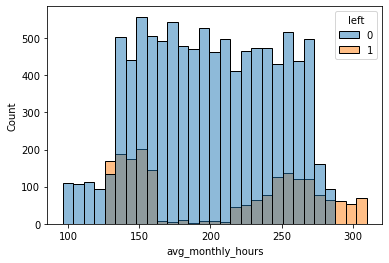

In [70]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='avg_monthly_hours', hue='left')

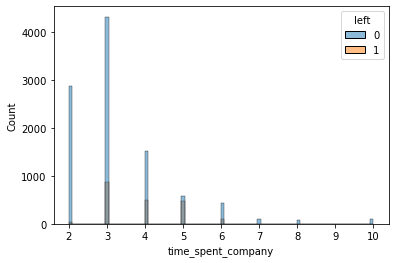

In [71]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='time_spent_company', hue='left')

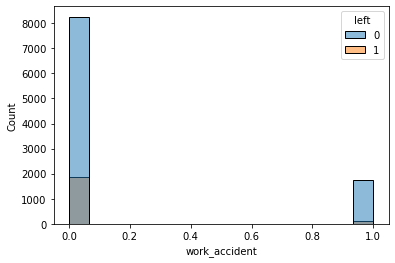

In [72]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='work_accident', hue='left')

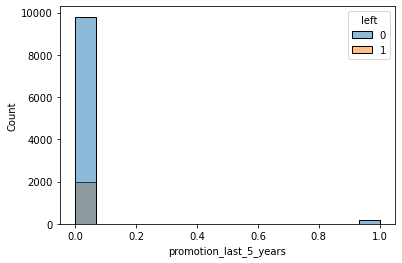

In [73]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, x='promotion_last_5_years', hue='left')

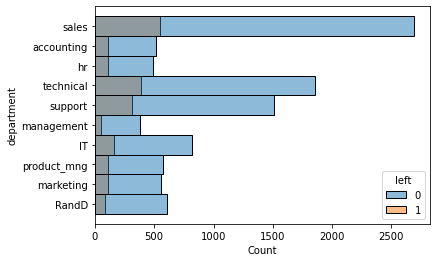

In [76]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_workable, y='department', hue='left')

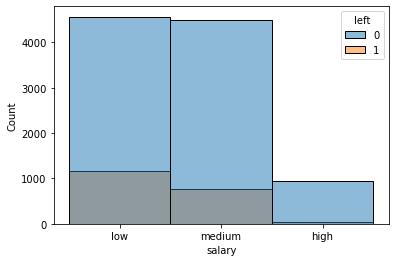

In [87]:
sns.histplot(data=df_workable, x='salary', hue='left')

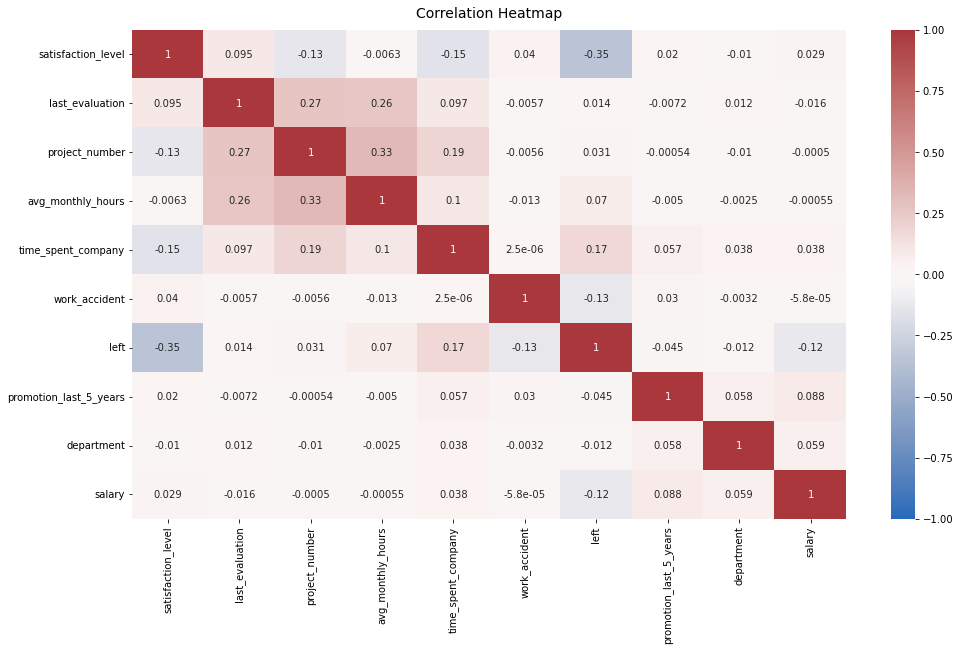

In [89]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_workable.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights


Low salary most likely to leave, along with those who work in sales, technical or support, working on project 2 or 7 and if their ranking on satisfaction level is low. Likely to stay if they are high pay, have gotten promotions in the past 5 years, work in management, have been at the company for over 6 years, are working on project 3 and rank their satisfaction level as high.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [19]:
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.formula.api import ols
from xgboost import XGBClassifier


In [20]:
#check types, transform object
df_workable.dtypes

satisfaction_level        float64
last_evaluation           float64
project_number              int64
avg_monthly_hours           int64
time_spent_company          int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
department                 object
salary                     object
dtype: object

In [21]:
df_workable['department'].value_counts()
department = {'sales' : 1, 'technical' : 2,'support':3,'IT':4,'RandD' :5,'product_mng':6,'marketing':7,'accounting':8,'hr':9, 'management' :10 }

In [22]:
df_workable['department'] = df_workable['department'].replace(to_replace=department)

In [23]:
df_workable['department'].value_counts()

1     3239
2     2244
3     1821
4      976
5      694
6      686
7      673
8      621
9      601
10     436
Name: department, dtype: int64

In [99]:
df_workable['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [28]:
df_workable['salary'] = df_workable['salary'].replace({'low':1, 'medium':2, 'high': 3})

In [27]:
pd.get_dummies(data = df_workable, columns=['salary'], drop_first=False)

,satisfaction_level,last_evaluation,project_number,avg_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,10,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,10,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,10,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,7,1,0,0


In [29]:
df_workable['salary'].value_counts()

1    5740
2    5261
3     990
Name: salary, dtype: int64

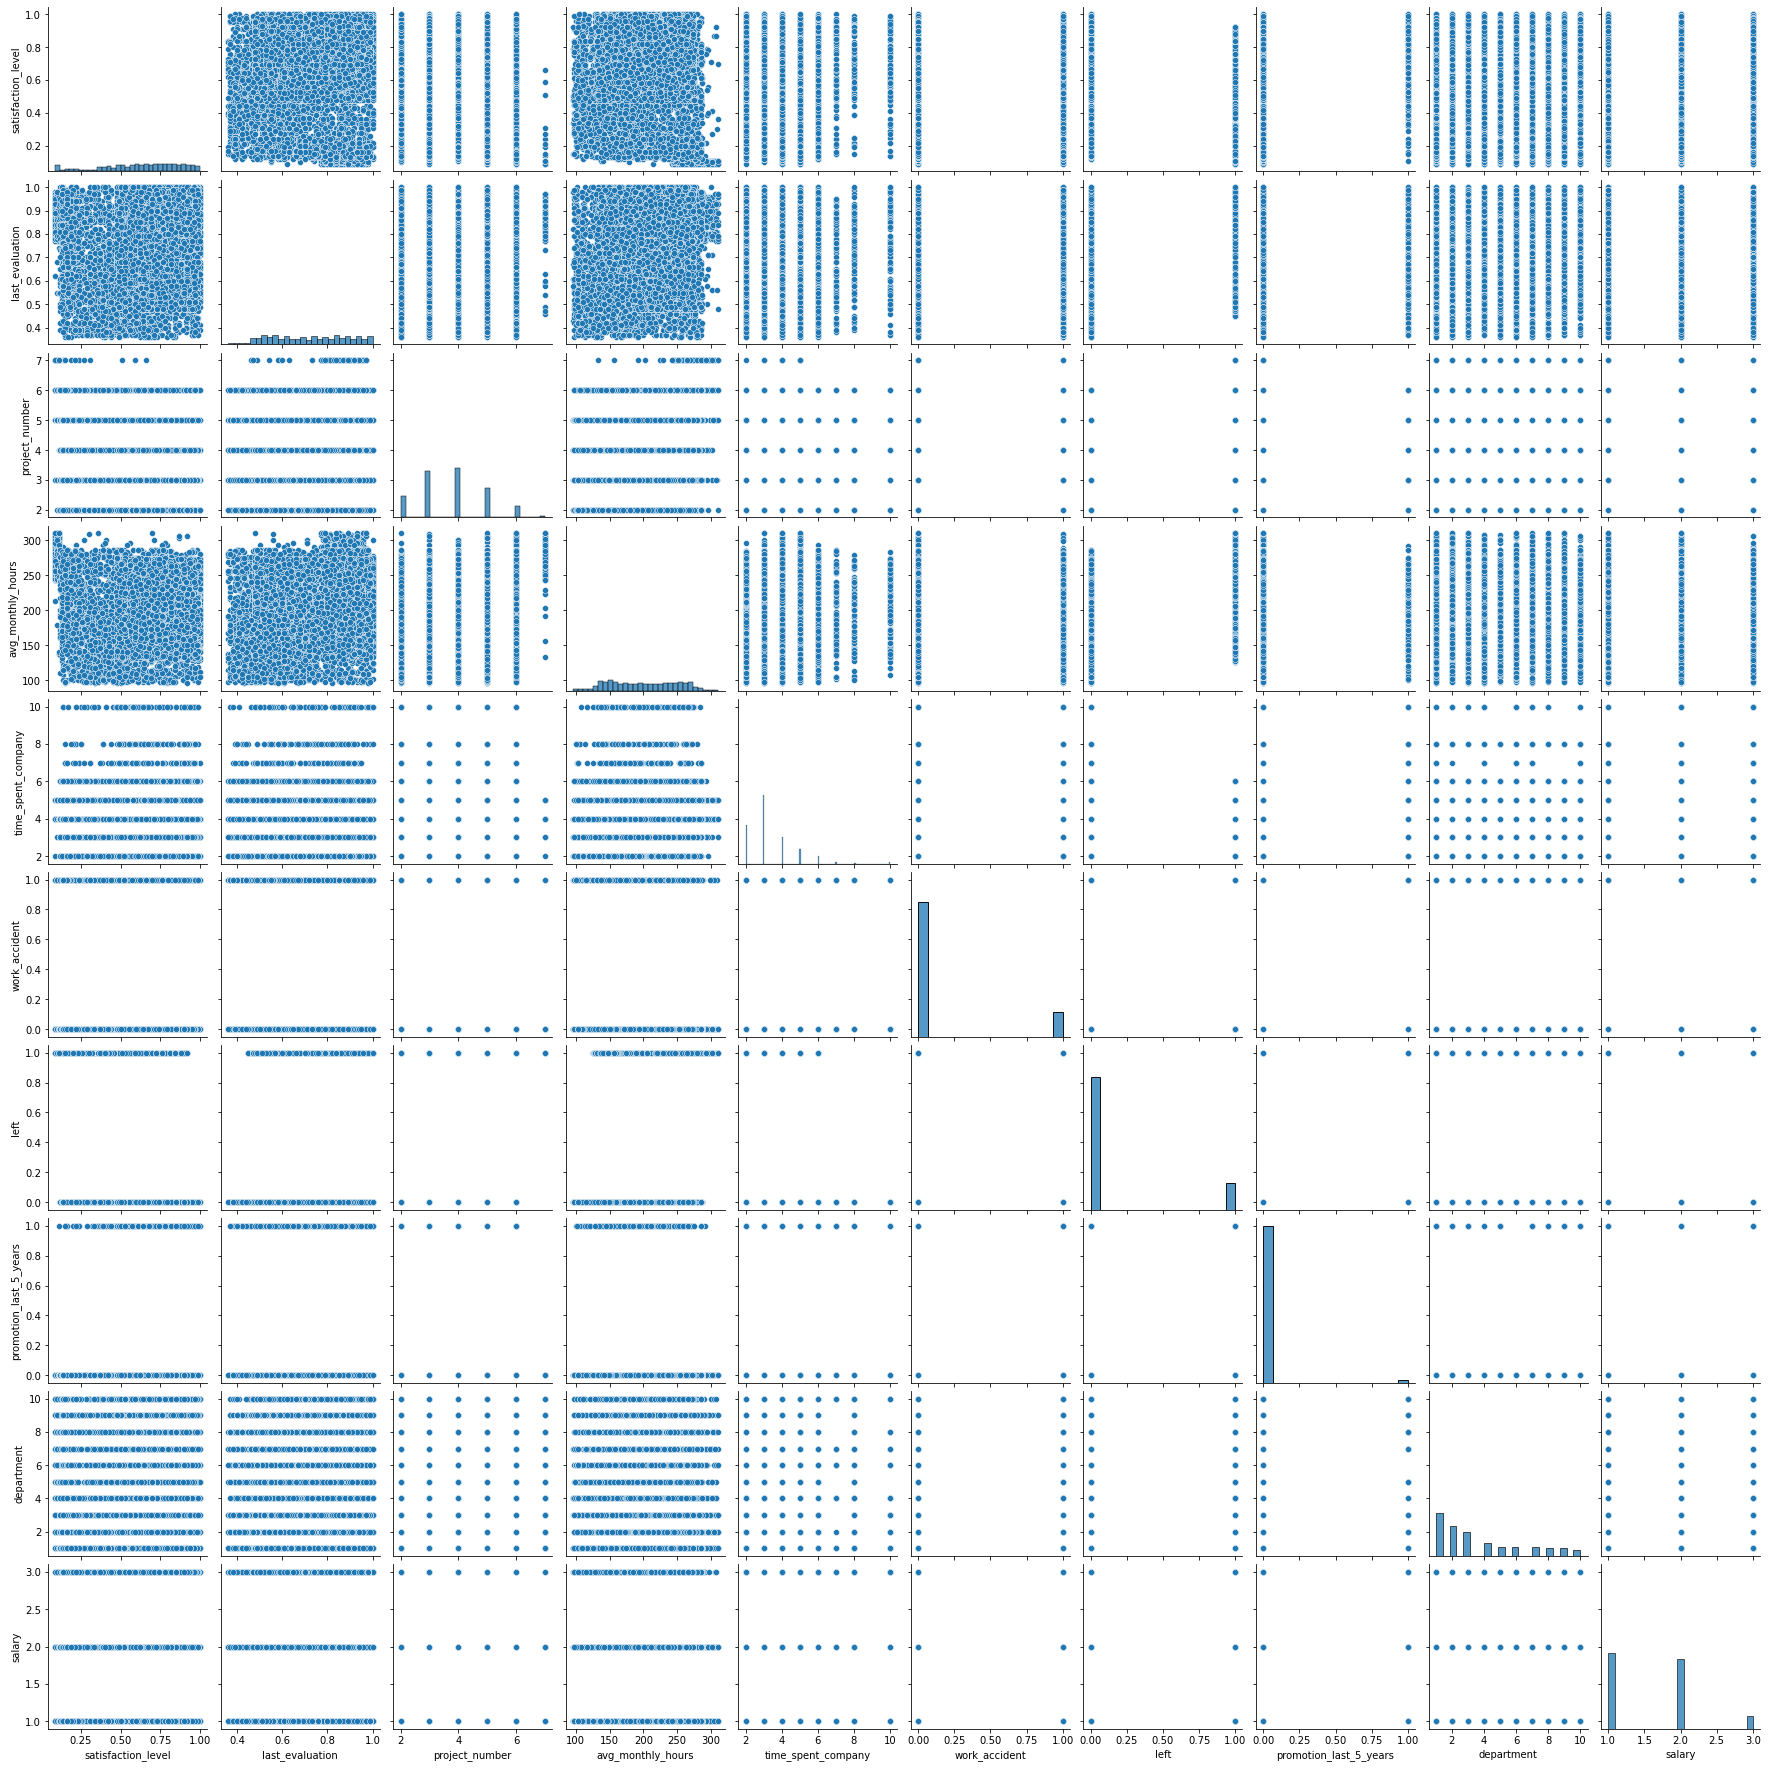

In [104]:
#create training and test data, determine variables
sns.pairplot(df_workable)

In [43]:
#import packages for RandomForets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
#create training and test data, determine variables
y = df_workable['left']

X= df_workable.copy()
X = df_workable.drop(columns=['left', 'last_evaluation','work_accident'])

In [32]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [33]:
X

,satisfaction_level,project_number,avg_monthly_hours,time_spent_company,promotion_last_5_years,department,salary
0,0.38,2,157,3,0,1,1
1,0.80,5,262,6,0,1,2
2,0.11,7,272,4,0,1,2
3,0.72,5,223,5,0,1,1
4,0.37,2,159,3,0,1,1
...,...,...,...,...,...,...,...
11995,0.90,3,259,10,1,10,3
11996,0.74,5,266,10,1,10,3
11997,0.85,3,185,10,1,10,3
11998,0.33,3,172,10,1,7,3


In [34]:
#separate train, test, and validation sets

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [140]:
#Tune the model
#set parameters

cv_params = {
    'n_estimators' : [50, 100, 150],
    'max_depth': [3,4,None],
    'min_samples_leaf' : [0.5,1],
    'min_samples_split' : [3, 4],
    'max_features' : ['sqrt'],
    'max_samples' : [.5, .7]
}

In [114]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [115]:
#instantiate model
rf= RandomForestClassifier(random_state=42)

rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose=1)

In [116]:
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 48 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  48 | elapsed:   21.8s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   22.7s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, 

In [117]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [119]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(max_depth = None,
 max_features ='sqrt',max_samples = 0.5,
 min_samples_leaf= 1,
 min_samples_split =3,
 n_estimators = 100, random_state=42)

In [120]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
# Predict on test set.
y_pred = rf_opt.predict(x_test)

In [123]:
#Precision
precision_score(y_test, y_pred)

0.9696312364425163

In [124]:
#Accuracy
accuracy_score(y_test, y_pred)

0.9786524349566378

In [125]:
#Recall
recall_score(y_test, y_pred)

0.8993963782696177

In [126]:
#f1
f1_score(y_test, y_pred)

0.9331941544885176

In [143]:
#instantiate new model refitng with recall
rf= RandomForestClassifier(random_state=42)

rf_val2 = GridSearchCV(rf, cv_params, cv=custom_split, refit='recall', n_jobs=-1, verbose=1)

In [144]:
rf_val2.fit(X_train, y_train)

Fitting 1 folds for each of 72 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   11.5s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, 

In [145]:
rf_val2.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [148]:
#Try xgboost
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [149]:
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

In [150]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [151]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [152]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 

!DECISION TREE MODEL

In [35]:
###DECISION TREE###
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [37]:
decision_tree = DecisionTreeClassifier(random_state=42)



In [38]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [39]:
dt_pred = decision_tree.predict(x_test)

In [40]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.967
Precision: 0.895
Recall: 0.905
F1 Score: 0.900


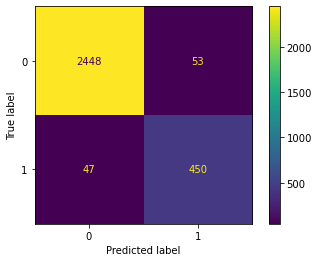

In [46]:
cm_dt = confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt , display_labels = decision_tree.classes_)

disp.plot(values_format='')
plt.show()

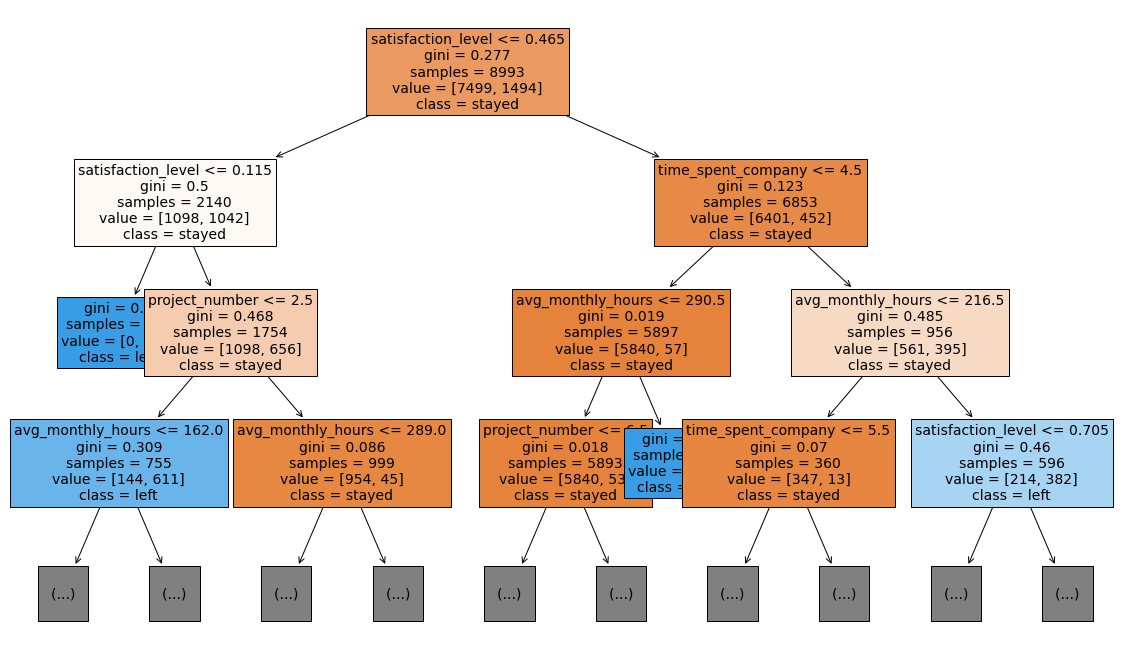

In [48]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

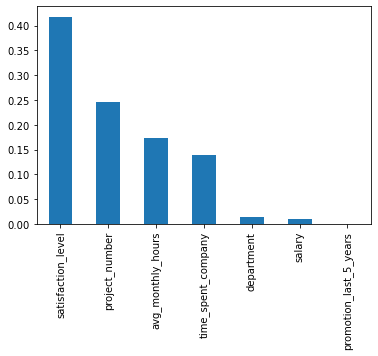

In [51]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

HYPERTUNING

In [52]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,2,3]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [68]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf= GridSearchCV(tuned_decision_tree, tree_para, scoring=scoring, cv=2, refit='f1')

In [69]:
clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3]},

In [70]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
clf.best_score_

0.9357940961847475

In [72]:
dt_tuned_preds = clf.best_estimator_.predict(x_test)

In [73]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_tuned_preds))
print("Precision:", "%.3f" % precision_score(y_test, dt_tuned_preds))
print("Recall:", "%.3f" % recall_score(y_test, dt_tuned_preds))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_tuned_preds))

Accuracy: 0.981
Precision: 0.968
Recall: 0.913
F1 Score: 0.940


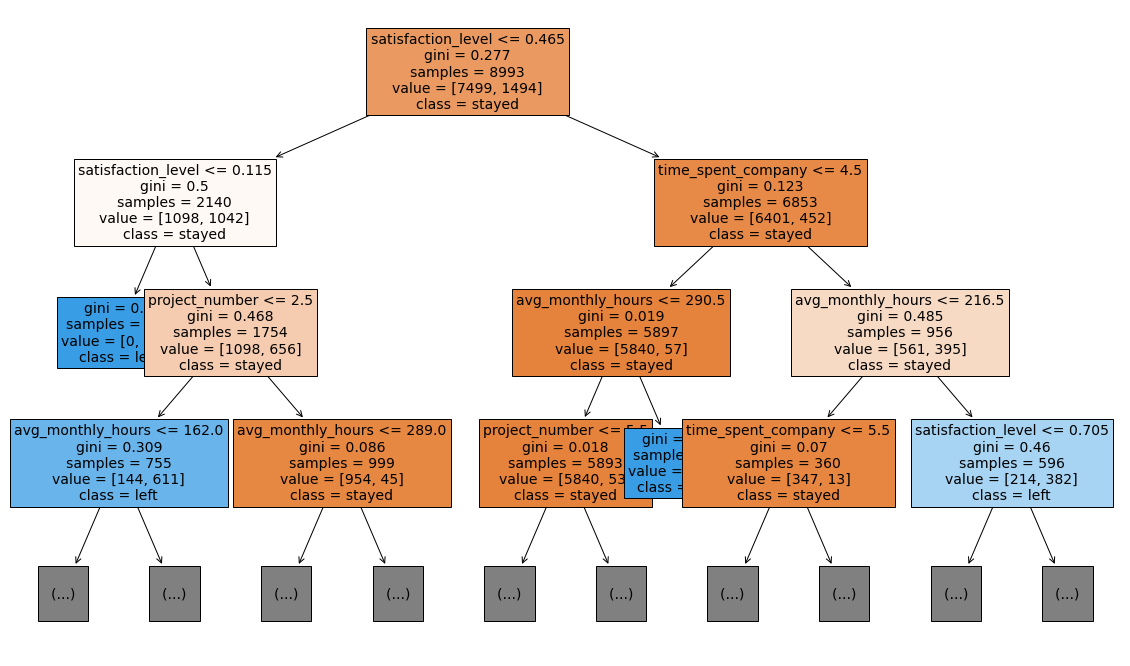

In [74]:
plt.figure(figsize=(20,12))

plot_tree(clf.best_estimator_, max_depth=3, fontsize=14, feature_names=X.columns,class_names={0:'stayed', 1:'left'}, filled=True )
plt.show()

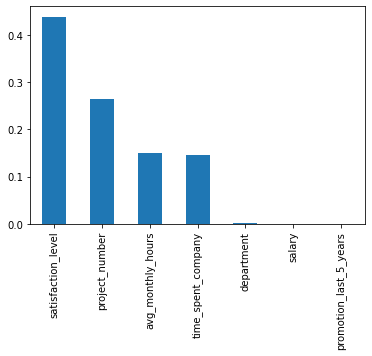

In [75]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);


- Interpret model performance and results
- Share actionable steps with stakeholders



In [133]:
# Create table of results.

### YOUR CODE HERE ###
table = pd.DataFrame({'Model': ["Tuned Random Forest"],
                        'F1':  f1_score(y_test, y_pred),
                        'Recall': recall_score(y_test, y_pred),
                        'Precision': precision_score(y_test, y_pred),
                        'Accuracy': accuracy_score(y_test, y_pred)
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.933194,0.899396,0.969631,0.978652


In [76]:
table = pd.DataFrame({'Model': ["Tuned Decision Tree"],
                        'F1':  f1_score(y_test, dt_tuned_preds),
                        'Recall': recall_score(y_test, dt_tuned_preds),
                        'Precision': precision_score(y_test, dt_tuned_preds),
                        'Accuracy': accuracy_score(y_test, dt_tuned_preds)
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.939959,0.913481,0.968017,0.980654


In [67]:
table = pd.DataFrame({'Model': ["Decision Tree"],
                        'F1':  f1_score(y_test, dt_pred),
                        'Recall': recall_score(y_test, dt_pred),
                        'Precision': precision_score(y_test, dt_pred),
                        'Accuracy': accuracy_score(y_test, dt_pred)
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.9,0.905433,0.894632,0.966644


In [123]:
table = pd.DataFrame({'Model': ["Tuned Decision Tree satisfactionless"],
                        'F1':  f1_score(y_test, tree_preds),
                        'Recall': recall_score(y_test, tree_preds),
                        'Precision': precision_score(y_test, tree_preds),
                        'Accuracy': accuracy_score(y_test, tree_preds)
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree satisfactionless,0.846296,0.917671,0.785223,0.94463


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




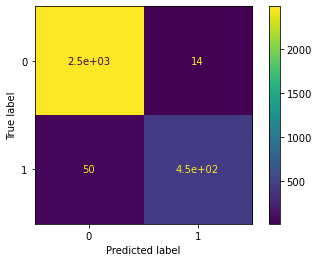

In [131]:
#visualize with confusion matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf_opt.classes_ )

disp.plot()

plt.show()

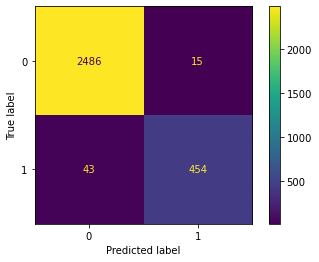

In [79]:
cm = confusion_matrix(y_test, dt_tuned_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf.best_estimator_.classes_)

disp.plot(values_format='')
plt.show()

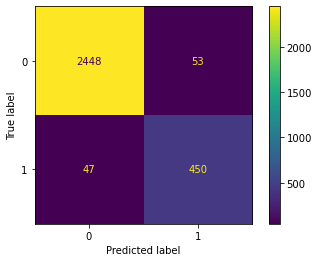

In [80]:
cm_dt = confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt , display_labels = decision_tree.classes_)

disp.plot(values_format='')
plt.show()

### FEATURE ENGINEERING

How to predict satisfaction level, catch it before employees decide they are unsatisfied. With hours worked and salary

In [91]:
df_ft = df_workable.drop('satisfaction_level', axis=1)

In [92]:
df_ft

,last_evaluation,project_number,avg_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary
0,0.53,2,157,3,0,1,0,1,1
1,0.86,5,262,6,0,1,0,1,2
2,0.88,7,272,4,0,1,0,1,2
3,0.87,5,223,5,0,1,0,1,1
4,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,0,1,10,3
11996,0.95,5,266,10,0,0,1,10,3
11997,0.54,3,185,10,0,0,1,10,3
11998,0.65,3,172,10,0,0,1,7,3


In [93]:
#Determine whether employee is working longer hours than most
df_ft['overworked'] = df_ft['avg_monthly_hours']

In [96]:
print('Max hours:', df_ft['overworked'].max())
print('Min hours:', df_ft['overworked'].min())

Max hours: 310
Min hours: 96


In [98]:
df_ft['overworked'].describe()



count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: overworked, dtype: float64

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

Being overworked == working more than 175 hours per month on average.

In [99]:
df_ft['overworked'] = (df_ft['overworked'] > 175).astype(int)

In [103]:
df_ft['overworked'].value_counts(normalize=True)*100

1    63.631057
0    36.368943
Name: overworked, dtype: float64

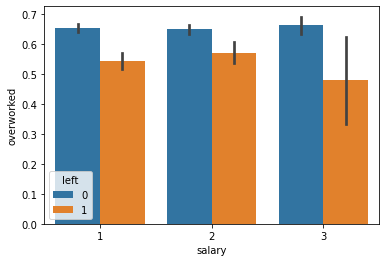

In [108]:
sns.barplot(data=df_ft, x='salary', y ='overworked', hue='left')

In [109]:
df_ft = df_ft.drop('avg_monthly_hours', axis=1)

In [112]:
##select x and y
y = df_ft['left']

X=df_ft.drop('left', axis=1)

In [114]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

#### DECISION TREE ROUND 2

In [116]:
tree = DecisionTreeClassifier(random_state=0)

#parameters
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
#dictionary for scoring

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree,cv_params, scoring=scoring,  cv=4, refit='roc_auc')

In [117]:
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [118]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [119]:
tree2.best_score_

0.9555613424897134

In [122]:
tree_preds = tree2.best_estimator_.predict(X_test)

In [ ]:
RANDOM FOREST

In [124]:
rf2 = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf3 = GridSearchCV(rf2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [125]:
rf3.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [126]:
rf3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [127]:
rf3.best_score_

0.9650560187906506

In [129]:
tuned_rf_pred = rf3.best_estimator_.predict(X_test)

In [130]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, tuned_rf_pred))
print("Precision:", "%.3f" % precision_score(y_test, tuned_rf_pred))
print("Recall:", "%.3f" % recall_score(y_test, tuned_rf_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, tuned_rf_pred))

Accuracy: 0.962
Precision: 0.872
Recall: 0.902
F1 Score: 0.886


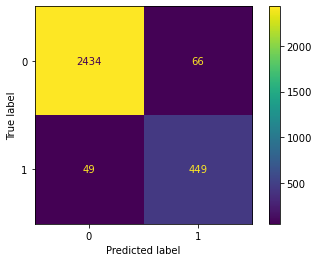

In [132]:
preds = rf3.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf3.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf3.classes_)
disp.plot(values_format='');

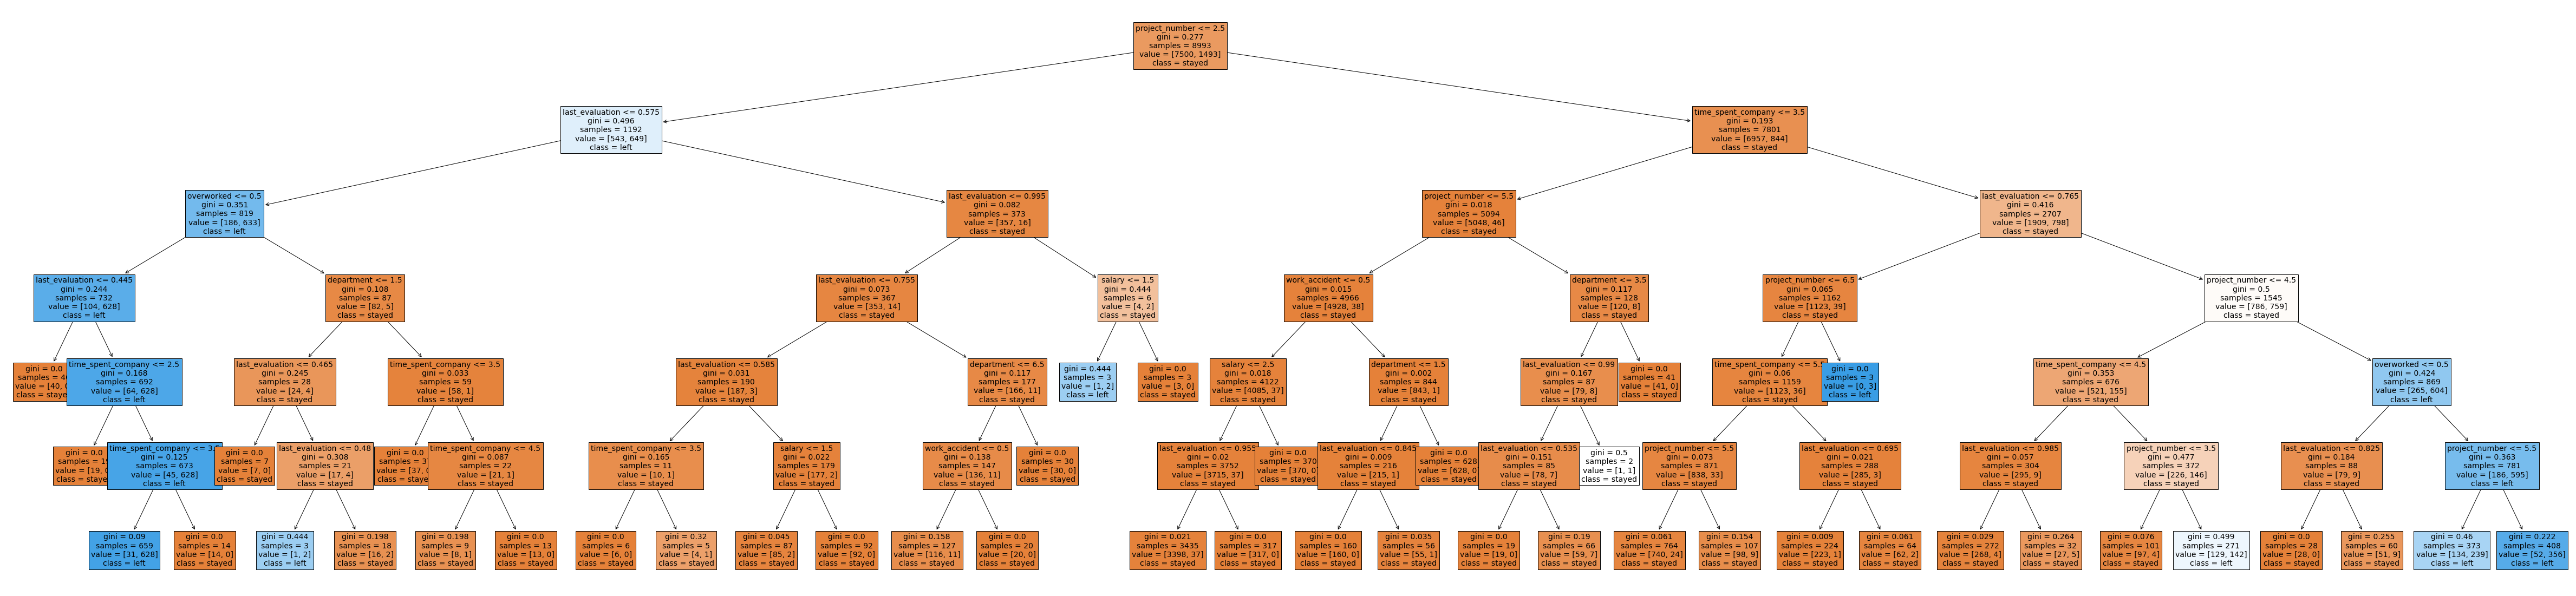

In [133]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [134]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
project_number,0.344370
last_evaluation,0.343854
time_spent_company,0.216603
overworked,0.093426
salary,0.000802
department,0.000754
work_accident,0.000191


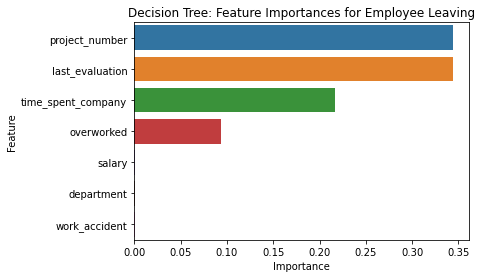

In [135]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

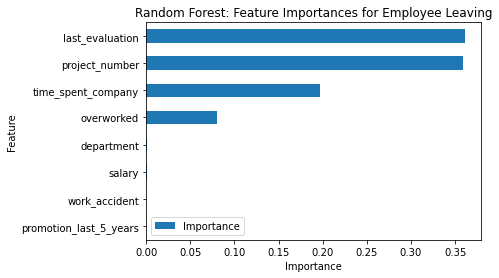

In [137]:
# Get feature importances
feat_impt = rf3.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf3.best_estimator_.feature_importances_, -8)[-8:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.